Précision du modèle : 0.92


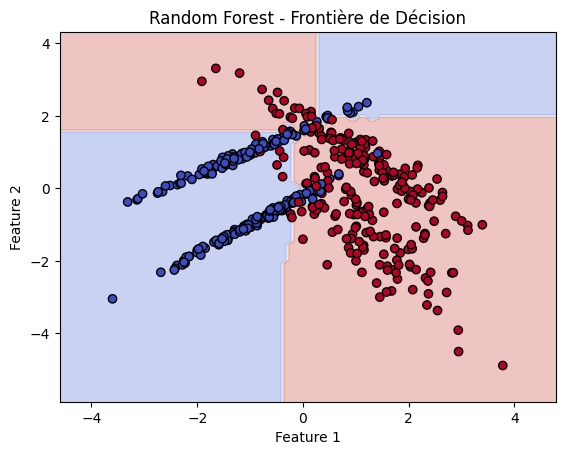

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Génération d'un dataset de classification
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest avec 100 arbres
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = rf.predict(X_test)
print(f"Précision du modèle : {accuracy_score(y_test, y_pred):.2f}")

# Visualisation de la frontière de décision
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Random Forest - Frontière de Décision")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Affichage de la frontière de décision
plot_decision_boundary(rf, X, y)
